In [1]:
import os
import re
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(seed=42) 

### ABCD CBCL Filtering

In [2]:
TASKDIR = "/DATA/ABCDTasks"
abcd_wm_qc_passing_keys = pd.read_csv("abcd_wm_qc_passing_keys.txt", header=None)
abcd_wm_qc_passing_keys

,0
0,NDAR_INVDPYR4KM2
1,NDAR_INVKN9RD01B
2,NDAR_INV99TVX9G8
3,NDAR_INVMU98HMRL
4,NDAR_INVAA78REX1
...,...
1360,NDAR_INVR268FVXE
1361,NDAR_INV0U23M45G
1362,NDAR_INV01EN91PG
1363,NDAR_INV7YU2MX4Y


In [3]:
header = pd.read_csv(f"{TASKDIR}/abcd_cbcls01.txt", sep="\t")[:1]
header

/tmp/ipykernel_1803/426566087.py:1: DtypeWarning: Columns (0,1,2,6,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88) have mixed types. Specify dtype option on import or set low_memory=False.
  header = pd.read_csv(f"{TASKDIR}/abcd_cbcls01.txt", sep="\t")[:1]


,collection_id,abcd_cbcls01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,eventname,cbcl_scr_syn_anxdep_r,...,cbcl_scr_07_sct_nm,cbcl_scr_07_ocd_r,cbcl_scr_07_ocd_t,cbcl_scr_07_ocd_m,cbcl_scr_07_ocd_nm,cbcl_scr_07_stress_r,cbcl_scr_07_stress_t,cbcl_scr_07_stress_m,cbcl_scr_07_stress_nm,collection_title
0,collection_id,abcd_cbcls01_id,dataset_id,The NDAR Global Unique Identifier (GUID) for r...,Subject ID how it's defined in lab/project,Date on which the interview/genetic test/sampl...,Age in months at the time of the interview/tes...,Sex of the subject,The event name for which the data was collected,AnxDep CBCL Syndrome Scale (raw score),...,Sluggish Cognitive Tempo (SCT) CBCL Scale2007 ...,Obsessive-Compulsive Problems (OCD) CBCL Scale...,Obsessive-Compulsive Problems (OCD) CBCL Scale...,Obsessive-Compulsive Problems (OCD) CBCL Scale...,Obsessive-Compulsive Problems (OCD) CBCL Scale...,Stress CBCL Scale2007 Scale (raw score),Stress CBCL Scale2007 Scale (t-score),Stress CBCL Scale2007 Scale (missing values),Stress CBCL Scale2007 Scale (number of missing...,collection_title


In [4]:
raw = pd.read_csv(f"{TASKDIR}/abcd_cbcls01.txt", sep="\t", skiprows=[1])
raw.tail()

/tmp/ipykernel_1803/1471118219.py:1: DtypeWarning: Columns (11,15,19,23,27,31,35,39,43,47,51,55,59,63,67,71,75,79,83,87) have mixed types. Specify dtype option on import or set low_memory=False.
  raw = pd.read_csv(f"{TASKDIR}/abcd_cbcls01.txt", sep="\t", skiprows=[1])


,collection_id,abcd_cbcls01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,eventname,cbcl_scr_syn_anxdep_r,...,cbcl_scr_07_sct_nm,cbcl_scr_07_ocd_r,cbcl_scr_07_ocd_t,cbcl_scr_07_ocd_m,cbcl_scr_07_ocd_nm,cbcl_scr_07_stress_r,cbcl_scr_07_stress_t,cbcl_scr_07_stress_m,cbcl_scr_07_stress_nm,collection_title
16821,2573,30568,19025,NDAR_INV0PRHUTZA,NDAR_INV0PRHUTZA,11/17/2016,129,M,baseline_year_1_arm_1,1.0,...,0.0,1.0,51.0,NaN,0.0,0.0,50.0,NaN,0.0,Adolescent Brain Cognitive Development Study (...
16822,2573,33179,19025,NDAR_INV20NDWAH8,NDAR_INV20NDWAH8,11/05/2017,115,M,baseline_year_1_arm_1,7.0,...,0.0,6.0,70.0,NaN,0.0,7.0,62.0,NaN,0.0,Adolescent Brain Cognitive Development Study (...
16823,2573,34181,19025,NDAR_INVA4EVCYRA,NDAR_INVA4EVCYRA,03/04/2017,113,M,baseline_year_1_arm_1,3.0,...,0.0,2.0,55.0,NaN,0.0,7.0,62.0,NaN,0.0,Adolescent Brain Cognitive Development Study (...
16824,2573,33205,19025,NDAR_INV24BT0Y26,NDAR_INV24BT0Y26,12/04/2017,113,M,baseline_year_1_arm_1,1.0,...,0.0,1.0,51.0,NaN,0.0,0.0,50.0,NaN,0.0,Adolescent Brain Cognitive Development Study (...
16825,2573,35228,19025,NDAR_INVCY51KY08,NDAR_INVCY51KY08,11/20/2017,118,M,baseline_year_1_arm_1,15.0,...,0.0,6.0,70.0,NaN,0.0,10.0,68.0,NaN,0.0,Adolescent Brain Cognitive Development Study (...


In [5]:
baselines = raw.query("eventname == 'baseline_year_1_arm_1'")
assert baselines.shape[0] == raw["subjectkey"].unique().shape[0]

# qc_passed = final_qc['subjectkey']
baselines = baselines[baselines["subjectkey"].isin(abcd_wm_qc_passing_keys[0])]
baselines.shape

(1365, 90)

In [6]:
t_score_cols = [x for x in raw.columns if re.match("cbcl_scr_syn_.*_t$", x)]
t_score_cols

['cbcl_scr_syn_anxdep_t',
 'cbcl_scr_syn_withdep_t',
 'cbcl_scr_syn_somatic_t',
 'cbcl_scr_syn_social_t',
 'cbcl_scr_syn_thought_t',
 'cbcl_scr_syn_attention_t',
 'cbcl_scr_syn_rulebreak_t',
 'cbcl_scr_syn_aggressive_t',
 'cbcl_scr_syn_internal_t',
 'cbcl_scr_syn_external_t',
 'cbcl_scr_syn_totprob_t']

In [7]:
summary_scales = [
  'cbcl_scr_syn_internal_t',
  'cbcl_scr_syn_external_t',
  'cbcl_scr_syn_totprob_t'
]
syndrome_scales = [
 'cbcl_scr_syn_anxdep_t',
 'cbcl_scr_syn_withdep_t',
 'cbcl_scr_syn_somatic_t',
 'cbcl_scr_syn_social_t',
 'cbcl_scr_syn_thought_t',
 'cbcl_scr_syn_attention_t',
 'cbcl_scr_syn_rulebreak_t',
 'cbcl_scr_syn_aggressive_t',
 
]

In [8]:
header[syndrome_scales]

,cbcl_scr_syn_anxdep_t,cbcl_scr_syn_withdep_t,cbcl_scr_syn_somatic_t,cbcl_scr_syn_social_t,cbcl_scr_syn_thought_t,cbcl_scr_syn_attention_t,cbcl_scr_syn_rulebreak_t,cbcl_scr_syn_aggressive_t
0,AnxDep CBCL Syndrome Scale (t-score),WithDep CBCL Syndrome Scale (t-score),Somatic CBCL Syndrome Scale (t-score),Social CBCL Syndrome Scale (t-score),Thought CBCL Syndrome Scale (t-score),Attention CBCL Syndrome Scale (t-score),RuleBreak CBCL Syndrome Scale (t-score),Aggressive CBCL Syndrome Scale (t-score)


In [9]:
# header[t_score_cols].to_csv("scales.txt", header=None, index=False, sep="\n")

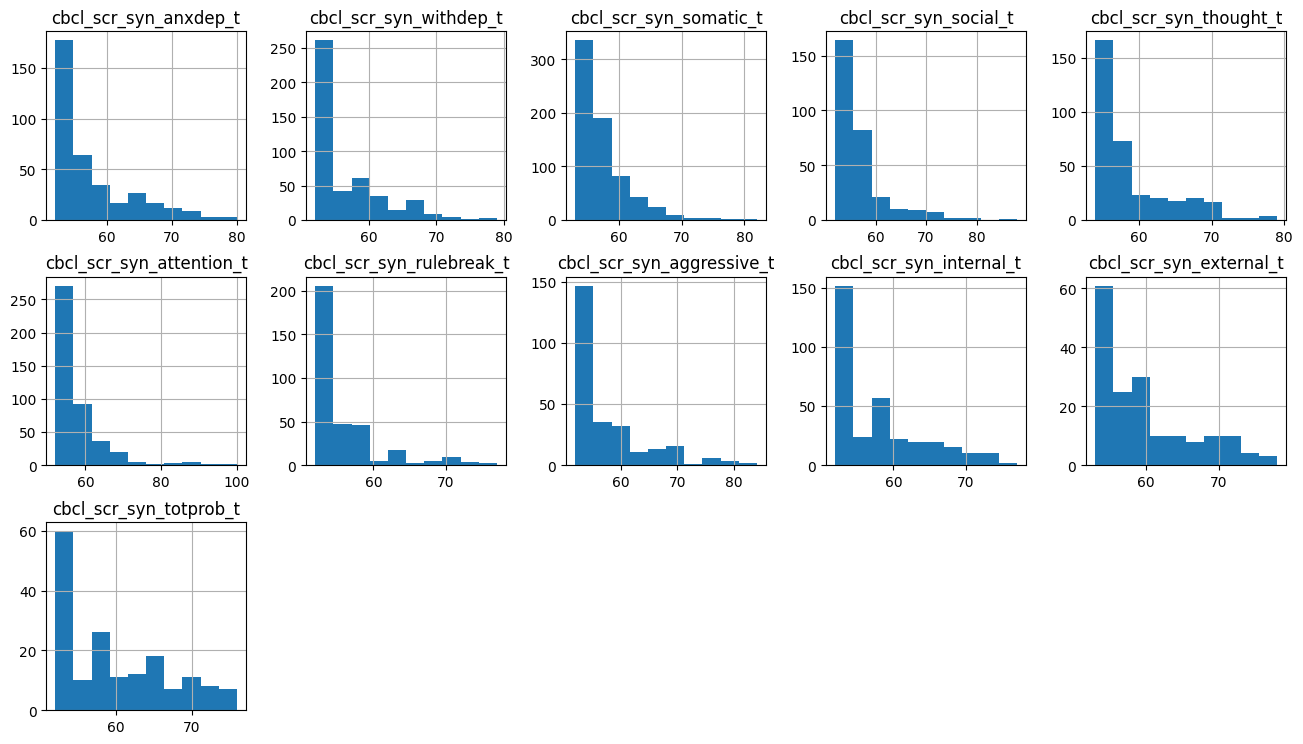

In [10]:
cbcl_scores = baselines[t_score_cols].copy()
right_tail = cbcl_scores[cbcl_scores > 51]
axs = right_tail.hist(figsize=(16,12), layout=(4,5))
# for ax in axs.flatten():
#     ax.set_xlim(55,None)
# plt.xlim(51,None)
plt.show()

In [11]:
cbcl_scores.shape

(1365, 11)

In [12]:
# According to orignal CBCL paper: https://pedsinreview.aappublications.org/content/21/8/265
# 67 ~= 96th Percentile
INLIER_THRESH = 66
summary_criteria = (cbcl_scores[summary_scales] < INLIER_THRESH).all(axis="columns")
syndrome_criteria = (cbcl_scores[syndrome_scales] < INLIER_THRESH).all(axis="columns") #.sum(axis="columns") <= 1
inlier_criteria = summary_criteria & syndrome_criteria
abcd_inliers = baselines[inlier_criteria]
abcd_inliers.shape

(1232, 90)

In [13]:
summary_criteria.sum(), syndrome_criteria.sum()

(1303, 1232)

In [14]:
# 70 ~= 98th Percentile
OUTLIER_THRESH = 70
summary_criteria = (cbcl_scores[summary_scales] > OUTLIER_THRESH).any(axis="columns") # In any  
syndrome_criteria = (cbcl_scores[syndrome_scales] > OUTLIER_THRESH).sum(axis="columns") >= 2
outlier_criteria = summary_criteria | syndrome_criteria
abcd_outliers = baselines[outlier_criteria]
abcd_outliers.shape

(35, 90)

In [15]:
summary_criteria.sum(), syndrome_criteria.sum()

(33, 24)

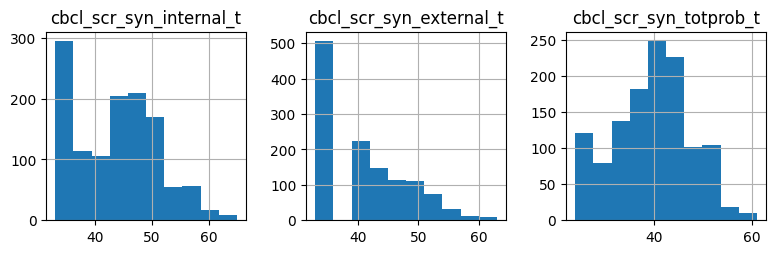

In [16]:
abcd_inliers[summary_scales].hist(figsize=(16,12), layout=(4,5))
plt.show()

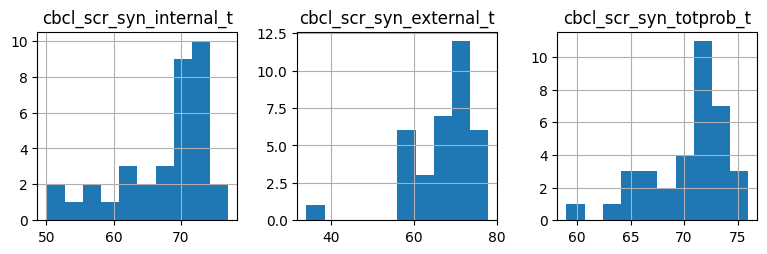

In [17]:
abcd_outliers[summary_scales].hist(figsize=(16,12), layout=(4,5))
plt.show()

### HCPD

In [18]:
hcpd_wm_qc_passing_keys = pd.read_csv("hcpd_wm_qc_passing_keys.txt", header=None)
hcpd_wm_qc_passing_keys

,0
0,HCD1855365
1,HCD1856468
2,HCD1857066
3,HCD1964269
4,HCD1983879
...,...
635,HCD2336346
636,HCD1778474
637,HCD2982276
638,HCD0577358


In [19]:
hcpd_header = pd.read_csv("/UTexas/HCP/HCPD/tabulated/cbcl01.txt", sep="\t")[:1]
hcpd_header

,collection_id,cbcl01_id,dataset_id,subjectkey,src_subject_id,interview_date,interview_age,sex,sports_time1,sports_well1,...,cbcl_deprpr_perc,cbcl_depresspr,cbcl_depresspr_raw,version_form,cbclpre35_start,cbclpre100,abcl_other_total,kkwithr,comqother,collection_title
0,collection_id,cbcl01_id,dataset_id,The NDAR Global Unique Identifier (GUID) for r...,Subject ID how it's defined in lab/project,Date on which the interview/genetic test/sampl...,Age in months at the time of the interview/tes...,Sex of the subject,Amount of time spent on sport1,How well youth does sport1,...,Depressive Problems Percentile,Depressive Problems T Score,Depressive Problems Raw Score,Form used/assessment name,"If your child gets into many fights, then desc...",Please write in any problems the child has tha...,Total score for Other Problems,Withdrawn Depressed Raw score,Respondent - Other (text),collection_title


In [20]:
for name, x in hcpd_header.items():
    eng_description = x.iloc[0].split('/')[0]
    print(f"{name:>20}:  {eng_description}")

       collection_id:  collection_id
           cbcl01_id:  cbcl01_id
          dataset_id:  dataset_id
          subjectkey:  The NDAR Global Unique Identifier (GUID) for research subject
      src_subject_id:  Subject ID how it's defined in lab
      interview_date:  Date on which the interview
       interview_age:  Age in months at the time of the interview
                 sex:  Sex of the subject
        sports_time1:  Amount of time spent on sport1
        sports_well1:  How well youth does sport1
        sports_time2:  Amount of time spent on sport2
        sports_well2:  How well youth does sport2
        sports_time3:  Amount of time spent on sport3
        sports_well3:  How well youth does sport3
               cbcl1:  Acts too young for his
               cbcl2:  Drinks alcohol without parents' approval
               cbcl3:  Argues a lot
               cbcl4:  Fails to finish things he
               cbcl5:  There is very little he
               cbcl6:  Bowel movements o

In [21]:
hcpd_cbcl_scores = pd.read_csv("/UTexas/HCP/HCPD/tabulated/cbcl01.txt", sep="\t", skiprows=[1])
hcpd_cbcl_scores.shape

(498, 217)

In [22]:
# hcpd_cbcl_scores.interview_age.hist()

In [23]:
hcpd_wm_qc_passing_keys =  pd.read_csv("hcpd_wm_qc_passing_keys.txt", header=None)
hcpd_wm_qc_passing_keys.shape

(640, 1)

In [24]:
hcpd_baselines = hcpd_cbcl_scores[hcpd_cbcl_scores["src_subject_id"].isin(hcpd_wm_qc_passing_keys[0])]
hcpd_baselines.shape

(491, 217)

In [25]:
hcpd_cbcl_summary_scales = ["cbcl_internal", "cbcl_external","cbcl_total"]


hcpd_cbcl_syndrome_scales = ["cbcl_anxious", "cbcl_depresspr", "cbcl_somatic_p",
                              "cbcl_social_p","cbcl_thought", "cbcl_attention",
                             "cbcl_rulebreak", "cbcl_aggressive"]

In [26]:
# According to orignal CBCL paper: https://pedsinreview.aappublications.org/content/21/8/265
# 67 ~= 96th Percentile
INLIER_THRESH = 66
summary_criteria = (hcpd_baselines[hcpd_cbcl_summary_scales] < INLIER_THRESH).all(axis="columns")
syndrome_criteria = (hcpd_baselines[hcpd_cbcl_syndrome_scales] < INLIER_THRESH).all(axis="columns")
inlier_criteria = summary_criteria & syndrome_criteria
hcpd_inliers = hcpd_baselines[inlier_criteria]
hcpd_inliers.shape

(418, 217)

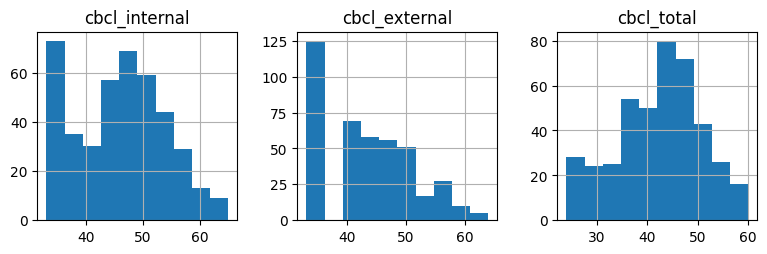

In [27]:
hcpd_inliers[hcpd_cbcl_summary_scales].hist(figsize=(16,12), layout=(4,5))
plt.show()

In [28]:
# 70 ~= 98th Percentile
OUTLIER_THRESH = 70
summary_criteria = (hcpd_baselines[hcpd_cbcl_summary_scales] > OUTLIER_THRESH).any(axis="columns") # In any  
syndrome_criteria = (hcpd_baselines[hcpd_cbcl_syndrome_scales] > OUTLIER_THRESH).sum(axis="columns") >= 2
outlier_criteria = summary_criteria | syndrome_criteria
hcpd_outliers = hcpd_baselines[outlier_criteria]
hcpd_outliers.shape

(2, 217)

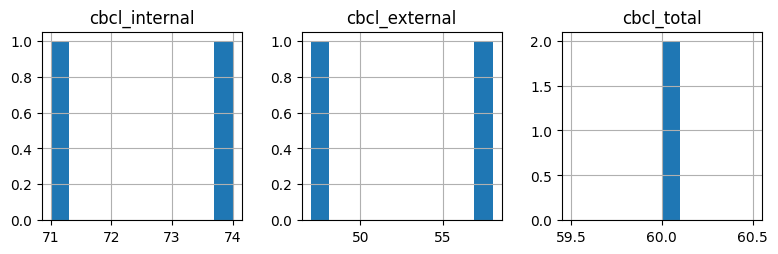

In [29]:
hcpd_outliers[hcpd_cbcl_summary_scales].hist(figsize=(16,12), layout=(4,5))
plt.show()

In [30]:
inlier_keys = pd.concat((abcd_inliers["subjectkey"] , hcpd_inliers["src_subject_id"]))
outlier_keys = pd.concat((abcd_outliers["subjectkey"] , hcpd_outliers["src_subject_id"]))
print(f"Number inliers: {len(inlier_keys)}")
print(f"Number outliers: {len(outlier_keys)}")

Number inliers: 1650
Number outliers: 37


In [31]:
VAL_RATIO = 0.1
val_size = int(VAL_RATIO * len(inlier_keys))
np.random.seed(42)
inlier_keys_shuffled = inlier_keys.sample(frac=1, random_state=42)

validation = inlier_keys_shuffled.iloc[:val_size]
testing = inlier_keys_shuffled.iloc[val_size:val_size*2]
training = inlier_keys_shuffled.iloc[val_size*2:]

In [32]:
assert np.sum((training.shape, validation.shape, testing.shape)) == inlier_keys.shape[0]
training.shape, validation.shape, testing.shape

((1320,), (165,), (165,))

In [34]:
training.to_csv("train_keys.txt", header=None, index=None)
validation.to_csv("val_keys.txt", header=None, index=None)
testing.to_csv("test_keys.txt", header=None, index=None)
outlier_keys.to_csv("ood_keys.txt", header=None, index=None)